# Libraries

The following cell contains the Python libraries needed for this seminar. They need to be installed in the running environment with the `pip install *library*` command.

In [63]:
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords

import pandas as pd

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

import sklearn
from sklearn import datasets, metrics, feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.manifold

import glob
import codecs
import re
#import gensim
#import gensim.models.word2vec as w2v
#import seaborn as sns
import scipy

# 1. Preprocessing techniques

## 1.1. *Tokenization*

How can we tokenize a sentence or string?

In [19]:
s = "I don't know. \n I had to be something, didn't   I?"

In [20]:
print(nltk.word_tokenize("I don't know. I had to be something, didn't I?"))

['I', 'do', "n't", 'know', '.', 'I', 'had', 'to', 'be', 'something', ',', 'did', "n't", 'I', '?']


In [21]:
print(nltk.word_tokenize("I don'tn know. I had to be something, didn'to I?"))

['I', "don'tn", 'know', '.', 'I', 'had', 'to', 'be', 'something', ',', "didn'to", 'I', '?']


If we want to use other languages, we need specific tokenizers:

In [22]:
toktok = nltk.ToktokTokenizer()

In [23]:
nltk.word_tokenize("¿Dónde estoy? ¿Puede alguien ayudarme ?")

['¿Dónde', 'estoy', '?', '¿Puede', 'alguien', 'ayudarme', '?']

In [24]:
toktok.tokenize("¿Dónde estoy? ¿Puede alguien ayudarme ?")

['¿', 'Dónde', 'estoy', '?', '¿', 'Puede', 'alguien', 'ayudarme', '?']

Now we will define a Python **function** that tokenizes the sentence it recives as a parameter:

In [25]:
def tokenize(sentence):
    return nltk.word_tokenize(sentence)

In [26]:
tokenize("I don't know. I had to be something, didn't I?")

['I',
 'do',
 "n't",
 'know',
 '.',
 'I',
 'had',
 'to',
 'be',
 'something',
 ',',
 'did',
 "n't",
 'I',
 '?']

## 1.2. *Stemming*

There are many models trained for word stemming in the `nltk` library:

* [Porter (1980)](http://snowball.tartarus.org/algorithms/porter/stemmer.html)
* [Lovins (1968)](http://snowball.tartarus.org/algorithms/lovins/stemmer.html)
* [Paice-Husk (1980)](https://en.wikipedia.org/wiki/Christopher_D._Paice#The_Paice-Husk_Stemming_Algorithm).

In [27]:
porter    = PorterStemmer()
lancaster = LancasterStemmer()

In [28]:
words = ["dogs","destabilize","misunderstanding","railroad","moonlight",
         "football","pass","passing","friendship", "friends", "friendships",
         "passed","trouble","troubling","care", "believes"]

In [29]:
print("{0:20}{1:20}{2:20}".format("Word", porter.__class__.__name__, lancaster.__class__.__name__))
print("")
for w in words:
    print( "{0:20}{1:20}{2:20}".format(w, porter.stem(w), lancaster.stem(w)))

Word                PorterStemmer       LancasterStemmer    

dogs                dog                 dog                 
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             
pass                pass                pass                
passing             pass                pass                
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
passed              pass                pass                
trouble             troubl              troubl              
troubling           troubl              troubl              
care                care                car                 
believes            bel

## 1.3. *Lemmatization*

The `nltk` library also has a lemmatizer model: [WordNet](https://wordnet.princeton.edu/).

In [30]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bahar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bahar\AppData\Roaming\nltk_data...


True

In [31]:
s = "You lived what anybody gets, Bernie. You got a lifetime."
words = nltk.word_tokenize(s)

In [32]:
print("{0:20}{1:20}".format("Word","Lemma"))
print("")
for word in words:
    print ("{0:20}{1:20}".format(word,lemmatizer.lemmatize(word)))

Word                Lemma               

You                 You                 
lived               lived               
what                what                
anybody             anybody             
gets                get                 
,                   ,                   
Bernie              Bernie              
.                   .                   
You                 You                 
got                 got                 
a                   a                   
lifetime            lifetime            
.                   .                   


But there are not many changes here...

We need to specify the **part of speech** to lemmatize to the model with the attribute `pos`

In [33]:
print("{0:20}{1:20}".format("Word","Lemma"))
print("")
for word in words:
    print ("{0:20}{1:20}".format(word,lemmatizer.lemmatize(word, pos="v")))

Word                Lemma               

You                 You                 
lived               live                
what                what                
anybody             anybody             
gets                get                 
,                   ,                   
Bernie              Bernie              
.                   .                   
You                 You                 
got                 get                 
a                   a                   
lifetime            lifetime            
.                   .                   


## 1.4. *Stop Words*

`nltk` has a list of stopwords in many languages:

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bahar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

If we want to filter them from a string, we first need to **tokenize** the sentence, and compare each token to the stop words dictionary:

In [37]:
s = "Any view of things that is not strange, is false."
words = nltk.word_tokenize(s)

In [38]:
stop_words = stopwords.words('english')

In [39]:
def filter_stop_words(sentence, stop_words):
    filtered = []
    for word in sentence:
        if word not in stop_words:
            filtered.append(word)
    return filtered

In [40]:
s = "Any view of things that is not strange, is false."
tokens = tokenize(s)
filtered = filter_stop_words(tokens, stop_words)
print(filtered)

['Any', 'view', 'things', 'strange', ',', 'false', '.']


## 1.5. *POS Tagging*

In [41]:
nltk.download('averaged_perceptron_tagger')
#Tag information: https://www.learntek.org/blog/categorizing-pos-tagging-nltk-python/

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bahar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
text = nltk.word_tokenize("They refuse to go")
print(nltk.pos_tag(text))

text = nltk.word_tokenize("We need the refuse permit")
print(nltk.pos_tag(text))

[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('go', 'VB')]
[('We', 'PRP'), ('need', 'VBP'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]


## 1.6. Example of a simple chatbot

In [43]:
s1 = "How do you play tennis?"
s2 = "How is football played?"
s3 = "How to score in tennis?"
s4 = "What are the basic rules of basketball?"
s5 = "Where do you typically play tennis?"

words = nltk.word_tokenize(s1.lower())

In [44]:
#POS tagging
tags = nltk.pos_tag(words)
print(tags)
nouns = [token for token, pos in tags if pos.startswith('N')]
verbs = [token for token, pos in tags if pos.startswith('V')]
adverbs = [token for token, pos in tags if pos.startswith('W')]

[('how', 'WRB'), ('do', 'VB'), ('you', 'PRP'), ('play', 'VB'), ('tennis', 'NN'), ('?', '.')]


In [45]:
#Lemmatize
print("{0:20}{1:20}".format("Word","Lemma"))
print("")
verbs_lemm = []
for verb in verbs:
    verbs_lemm.append(lemmatizer.lemmatize(verb, pos="v"))
    print ("{0:20}{1:20}".format(verb,lemmatizer.lemmatize(verb, pos="v")))

Word                Lemma               

do                  do                  
play                play                


In [46]:
print("Nouns:", nouns)
print("Verbs:", verbs_lemm)
print("Adverbs:", adverbs)

Nouns: ['tennis']
Verbs: ['do', 'play']
Adverbs: ['how']


In [64]:
if 'how' in adverbs:
    if 'play' in verbs_lemm:
        show_definition(nouns)
    if 'score' in verbs_lemm:
        show_scoring(nouns)
elif 'what' in adverbs:
    if 'rules' in nouns:
        nouns.remove('rules')
        show_definition(nouns)
elif 'where' in adverbs:
    if 'play' in verbs_lemm:
        show_places(nouns)

Tennis is a racket sport played on a rectangular court, where two players or teams take turns serving and hitting a ball over a net, aiming to score points by making the ball land in the opponent's court.


In [65]:
def show_definition(nouns):
    rules = {'football': 'Football is a team sport played with an oval ball on a rectangular field, where two teams aim to score points by advancing the ball into the opposing team\'s end zone through running or passing, with each possession starting from a scrimmage and involving downs, while the defense tries to stop the offense and gain possession.',
            'tennis': 'Tennis is a racket sport played on a rectangular court, where two players or teams take turns serving and hitting a ball over a net, aiming to score points by making the ball land in the opponent\'s court.',
            'basketball': 'Basketball is a fast-paced team sport where two teams of five players each compete to score points by shooting the ball through the opponent\'s basket while following rules such as dribbling, passing, and defending within a designated court.'}
    for noun in nouns:
        try:
            print(rules[noun]);
        except:
            None

def show_scoring(nouns):
    rules = {'football': 'In football, teams score points by getting the ball into the opponent\'s end zone or kicking it through the goalposts.',
            'tennis': 'In tennis, points are scored by winning rallies, with games, sets, and matches determined by accumulating points through successful serves and rallies.',
            'basketball': 'In basketball, points are scored by shooting the ball through the opponent\'s basket, with field goals counting for two or three points and free throws for one point each.'}
    for noun in nouns:
        try:
            print(rules[noun]);
        except:
            None

def show_places(nouns):
    rules = {'football': 'Football is played on a rectangular field.',
            'tennis': 'Tennis is played on a rectangular court with a net.',
            'basketball': 'Basketball is played on a rectangular court with hoops at each end.'}
    for noun in nouns:
        try:
            print(rules[noun]);
        except:
            None

# 2. Encoders

## 2.1. *One Hot Encoding*

How to create the One Hot encoding vectors of a sentence:

In [52]:
tokens = nltk.word_tokenize("The world is indeed comic")

In [53]:
pd.get_dummies(tokens)

,The,comic,indeed,is,world
0,True,False,False,False,False
1,False,False,False,False,True
2,False,False,False,True,False
3,False,False,True,False,False
4,False,True,False,False,False


## 2.2. *Count Vectorizer*

We could create a Count Vectorizer by ourselves but... We can also use libraries :)

The Python library `sklearn` implements a  [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) model.

If not given a specific vocabulary, the model uses its own tokenizer to build a vocabulary given an input sentence.

In [54]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()

In [55]:
text = ["Today is the day that I do the thing today, today"]

In [56]:
vectorizer.fit(text)
print(vectorizer.vocabulary_)

{'today': 6, 'is': 2, 'the': 4, 'day': 0, 'that': 3, 'do': 1, 'thing': 5}


In [57]:
vector = vectorizer.transform(text)
print(vector.toarray())

[[1 1 1 1 2 1 3]]


In [58]:
print(vectorizer.transform(['today']).toarray())

[[0 0 0 0 0 0 1]]


An other example with vocabulary extracted from all the samples.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer() #sklearn.feature_extraction.text.CountVectorizer()
X = vectorizer.fit(corpus)
print(vectorizer.vocabulary_)
vector = vectorizer.transform(corpus)
print(vector.toarray())
print('Document',vectorizer.transform(['document']).toarray())

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Document [[0 1 0 0 0 0 0 0 0]]


If we can characterize a text with a single vector, can we make a **text classifier** with a count vectorizer?

Let's try with real data!

We will use a dataset of real messages that are classified in 20 categories, collected by [20newsgroup](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html):
* **Classes: 20** ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
* **Samples: 18846**
* **Dimensionality: 1**
* **Attributes: text**

In [69]:
data = sklearn.datasets.fetch_20newsgroups()

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\bahar\\scikit_learn_data\\20news_home\\20news-bydate.tar.gz'

In [67]:
data

NameError: name 'data' is not defined

This is the first sample of the dataset:

In [68]:
print(data["data"][0])

NameError: name 'data' is not defined

Class the sample belongs:

In [ ]:
print(data["target"][0])

7


We select the input and output data for the training of the model:

* X corresponds to the inputs --> the text samples
* Y corresponds to the outputs --> the class the text belongs to

In [ ]:
x_train = sklearn.datasets.fetch_20newsgroups(subset="train").data
y_train = sklearn.datasets.fetch_20newsgroups(subset="train").target

In [ ]:
print(len(x_train))
print(len(y_train))

11314
11314


Now that we have the training text samples, we can build a vocabulary.

We use a Python dictionary to define the vocabulary following this steps for all the input samples:
1. Tokenize the input sample
2. Normalize the tokens to lower case
3. If the token is not yet in the vocabulary, add it.


In [ ]:
vocabulary = {}
i = 0
for x in data["data"]:
    words = tokenize(x)
    for w in words:
        w = w.lower()
        if w not in vocabulary:
            vocabulary[w] = i
            i = i+1

The length of our vocabulary defines the number of different tokens in all the samples of the training dataset.

In [ ]:
len(vocabulary)

180955

Now we can use the `sklearn` count vectorizer with our vocabulary from the data:

In [ ]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(vocabulary=vocabulary)

In [ ]:
len(count_vectorizer.vocabulary)

180955

The count vectorizer uses the one hot encoding added for all the tokens of a sentence to encode a sample of text.

If we encode the entire dataset of training samples, the encoded dataset will have the dimensions of the number of samples x the length of the vocabulary.

In [ ]:
x_train_encoded = count_vectorizer.transform(x_train)

In [ ]:
x_train_encoded

<11314x180955 sparse matrix of type '<class 'numpy.int64'>'
	with 1730260 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_encoded[0].toarray()

array([[3, 0, 2, ..., 0, 0, 0]], dtype=int64)

In [ ]:
x_train_encoded[0].nonzero()[1]

array([    0,     2,     6,     8,     9,    11,    12,    13,    14,
          15,    20,    21,    22,    23,    25,    26,    27,    28,
          30,    31,    32,    33,    34,    35,    36,    37,    38,
          39,    40,    41,    42,    43,    45,    48,    49,    50,
          51,    52,    54,    55,    56,    57,    58,    59,    60,
          61,    62,    63,    64,    65,    66,    67,    68,    69,
          70,    71,    72,    73,    74,    75,    76,    77,    78,
          79,    80,    81,    82,    83,    84,    85,    86,    87,
          88,    90,    92,    94,    95,    96,    97,   994,  2265,
        4184, 14699, 37696, 63413, 72542])

Now we can train a **classifier model** that uses the encoded text samples to predict the class of the text. We will use the Logistic regression with 180929 input variables for each X sample and 20 possible classes as output.

First we declare the model using the [`sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) library:

In [ ]:
model = sklearn.linear_model.LogisticRegression(multi_class='ovr', max_iter=500)

Now we need to start the training process with the `fit` function.

In [ ]:
model.fit(x_train_encoded, y_train)

LogisticRegression(max_iter=500, multi_class='ovr')

Now we can use the trained model to make a **prediction** of an input samples class:

In [ ]:
y_hat = model.predict(x_train_encoded[0])

In [ ]:
print(y_hat[0], y_train[0])

7 7


We can compute the accuracy as the number of correct predictions vs total predictions using the function `score`:

In [ ]:
model.score(x_train_encoded, y_train)

0.999734841788934

But the `train` samples are the same used to train the model. What happens when we test the same model with new data that was never seen before?

In [ ]:
x_test  = sklearn.datasets.fetch_20newsgroups(subset="test").data
y_test  = sklearn.datasets.fetch_20newsgroups(subset="test").target

In [ ]:
x_test_encoded = count_vectorizer.transform(x_test)

In [ ]:
model.score(x_test_encoded, y_test)

0.8060276155071694

When using data not seen before, the accuracy decreases. This is a symptom that the model is **overfitted**, which means that it has got used to the training samples and is not that good at generalizing the knowledge to unseen samples.

* It can be detected by evaluating the model with unseen data: it is important to split the dataset into **train and test!**
* It can be prevented by fine tunning the parameters of the model.

## 2.3. Other encoders

### 2.3.1. TF-IDF

We will use the same `20newsgroup` dataset as used previously with the Bag of Words and the Logistic Regression:

In [ ]:
len(vocabulary)

180929

In [ ]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=vocabulary)

In [ ]:
fit_output = tfidf_vectorizer.fit(x_train)

In [ ]:
tfidf_x_train = tfidf_vectorizer.transform(x_train)

In [ ]:
print(tfidf_x_train[0].toarray())
print(len(tfidf_x_train[0].toarray()[0]))

[[0.06190536 0.         0.3811419  ... 0.         0.         0.        ]]
180929


Now we can use the same logistic regression but with the tf-idf encoding:

In [ ]:
model2 = sklearn.linear_model.LogisticRegression(multi_class='ovr', max_iter=500)
model2.fit(tfidf_x_train, y_train)

LogisticRegression(max_iter=500, multi_class='ovr')

In [ ]:
model2.score(tfidf_x_train, y_train)

0.9683577868127983

Now we can check again with the unseen data (test):

In [ ]:
tfidf_x_test = tfidf_vectorizer.transform(x_test)
model2.score(tfidf_x_test, y_test)

0.8275358470525757

### 2.3.2. *Word2Vec*

There are libraries that provide a pretrained model of Word2Vev, but we can also train it ourselves.

In [ ]:
book_filenames = sorted(glob.glob("../NLP/data/books/*"))
book_filenames

['../NLP/data/books/01 - The Fellowship Of The Ring.txt',
 '../NLP/data/books/02 - The Two Towers.txt',
 '../NLP/data/books/03 - The Return Of The King.txt']

In [ ]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "ISO-8859-1") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '../NLP/data/books/01 - The Fellowship Of The Ring.txt'...
Corpus is now 1025382 characters long

Reading '../NLP/data/books/02 - The Two Towers.txt'...
Corpus is now 1863438 characters long

Reading '../NLP/data/books/03 - The Return Of The King.txt'...
Corpus is now 2590122 characters long



In [ ]:
corpus_raw[0:50]

'Three Rings for the Elven-kings under the sky,\r\n  '

We need to tokenize and clean the text:

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
raw_sentences = tokenizer.tokenize(corpus_raw)

In [ ]:
raw_sentences[0]

'Three Rings for the Elven-kings under the sky,\r\n               Seven for the Dwarf-lords in their halls of stone,\r\n            Nine for Mortal Men doomed to die,\r\n              One for the Dark Lord on his dark throne\r\n           In the Land of Mordor where the Shadows lie.'

In [ ]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [ ]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [ ]:
len(sentences)

35057

In [ ]:
print(list(sentences[0]))

['Three', 'Rings', 'for', 'the', 'Elven', 'kings', 'under', 'the', 'sky', 'Seven', 'for', 'the', 'Dwarf', 'lords', 'in', 'their', 'halls', 'of', 'stone', 'Nine', 'for', 'Mortal', 'Men', 'doomed', 'to', 'die', 'One', 'for', 'the', 'Dark', 'Lord', 'on', 'his', 'dark', 'throne', 'In', 'the', 'Land', 'of', 'Mordor', 'where', 'the', 'Shadows', 'lie']


In [ ]:
token_count = sum([len(sentence) for sentence in sentences])
print(token_count)

484761


Now we can declare the w2v model and train it to encode each word to a vector of 300 dimensions:

In [ ]:
word2vec = w2v.Word2Vec(vector_size=300, seed=1, sg=1, min_count=0, window=5)
word2vec.build_vocab(sentences)

In [ ]:
word2vec.corpus_count

35057

In [ ]:
len(word2vec.wv.key_to_index)

14473

In [ ]:
word2vec.train(sentences, epochs = 10, total_examples=len(sentences))

(3677941, 4847610)

In [ ]:
word2vec.wv.get_vector("fellowship").shape

(300,)

Since now we have a word representation of 300 dimensions, we can calculate which words are more similar to a sample:

In [ ]:
w = "Gandalf"
word2vec.wv.most_similar(positive=w, topn=5)

[('Beregond', 0.7283896803855896),
 ('Strider', 0.7186293005943298),
 ('Boromir', 0.7063998579978943),
 ('Glorfindel', 0.6911081671714783),
 ('omer', 0.6842440366744995)]

In [ ]:
w = "ring"
word2vec.wv.most_similar(positive=w, topn=5)

[('finger', 0.7306904196739197),
 ('rope', 0.6665630340576172),
 ('partly', 0.6533588171005249),
 ('hole', 0.6516368985176086),
 ('book', 0.6478604674339294)]

In [ ]:
w = "bow"
word2vec.wv.most_similar(positive=w, topn=5)

[('arrow', 0.8122103214263916),
 ('axe', 0.8088790774345398),
 ('haft', 0.8069832921028137),
 ('laying', 0.7951961159706116),
 ('heels', 0.7778100371360779)]

We can also check the level of similarity between two words:

In [ ]:
word2vec.wv.similarity("Smaug","dragon")

0.79052097

In [ ]:
word2vec.wv.similarity("Smaug","gold")

0.4900238

In [ ]:
word2vec.wv.similarity("Smaug","big")

0.53689146

In [ ]:
word2vec.wv.similarity("Smaug","small")

0.4667307

In [ ]:
word2vec.wv.similarity("shoot","arrow")

0.5252606

In [ ]:
word2vec.wv.similarity("shoot","sword")

0.3572294

We can also compute additions and subtractions of the vectors:

In [ ]:
word2vec.wv.most_similar(positive=["Frodo", "elf"], negative=["hobbit"])[0]

('Galadriel', 0.6665794849395752)

In [ ]:
word2vec.wv.most_similar(positive=["Gimli", "bow"], negative=["axe"])[0]

('Legolas', 0.7462732195854187)

In [ ]:
word2vec.wv.most_similar(positive=["ring", "Sauron"], negative=["Frodo"])[0]

('power', 0.6512686014175415)

Now we can try to condense the feature vectors of 300 dimensions to 2 dimensions so that we can visualize it as an image. We will use several libraries:

In [ ]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0, n_iter=500)

In [ ]:
vectors_2d = tsne.fit_transform(word2vec.wv.vectors)

In [ ]:
vectors_2d.shape, len(word2vec.wv.vectors)

((14473, 2), 14473)

In [ ]:
words = word2vec.wv.key_to_index
points = pd.DataFrame(
    [(w, c[0], c[1]) for w,c in zip(words, vectors_2d)],
    columns=["word", "x", "y"]
)

<AxesSubplot: xlabel='x', ylabel='y'>

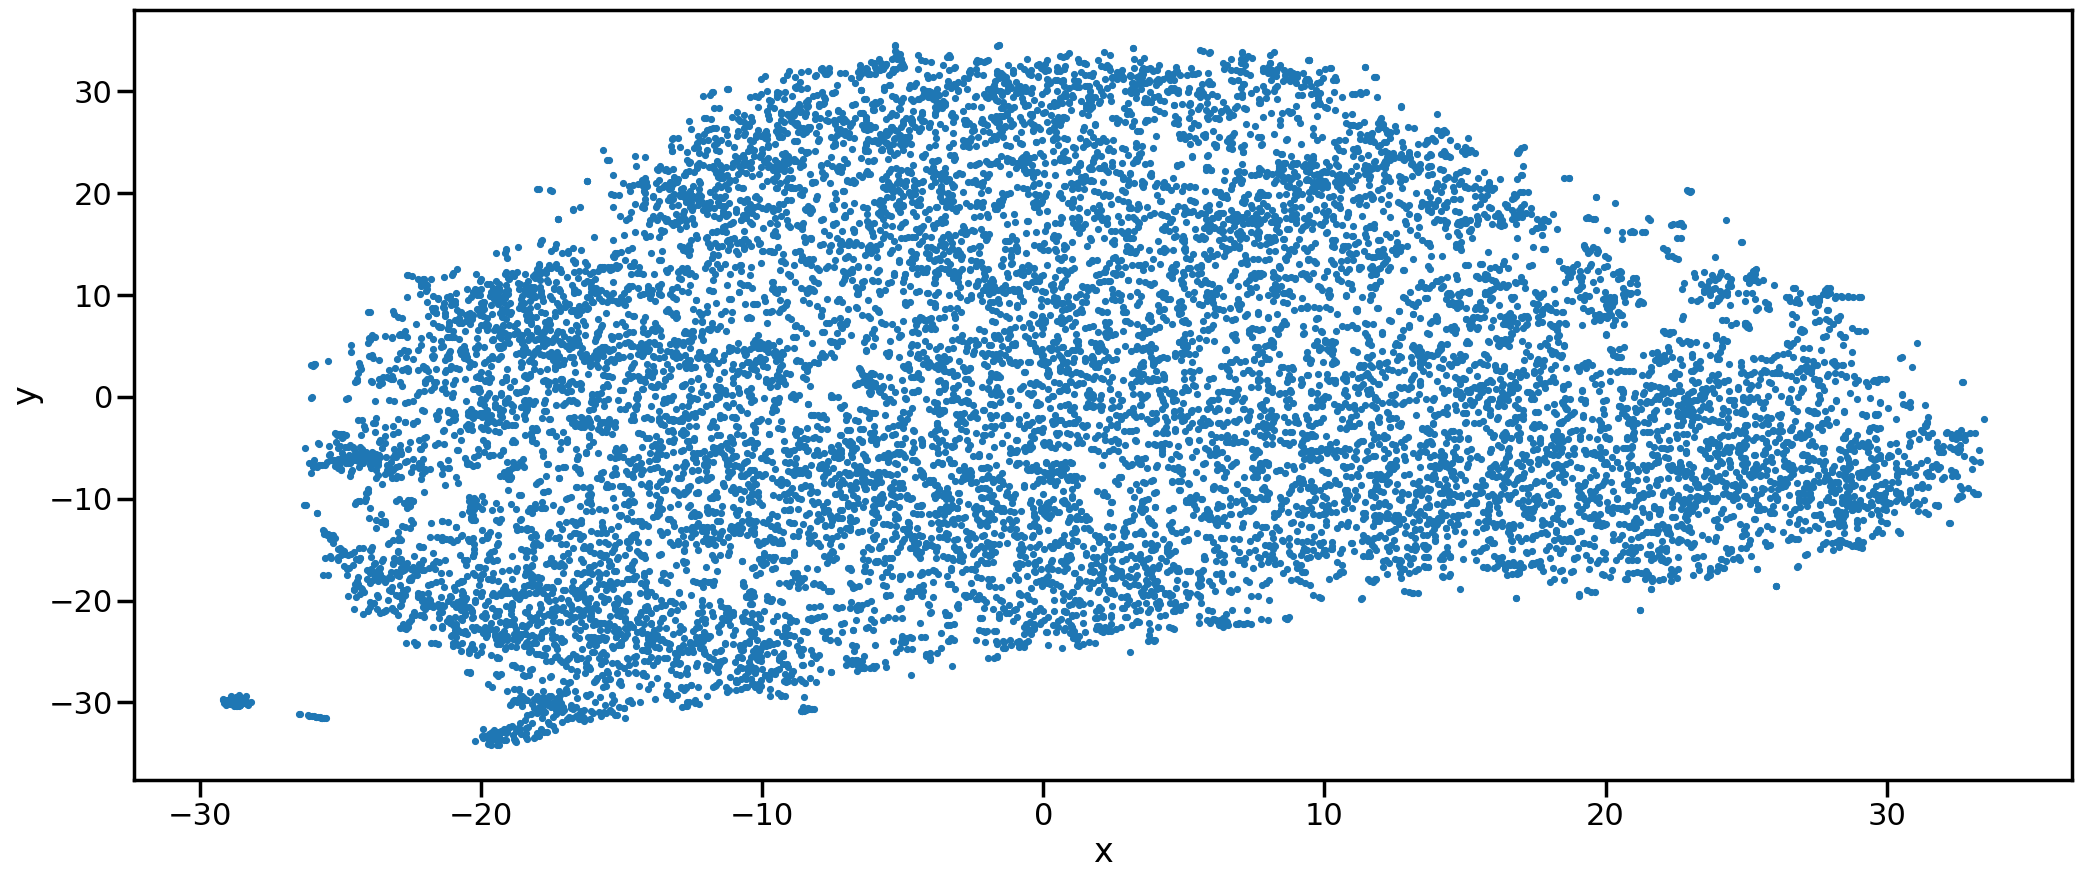

In [ ]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(25, 10))

We can find the position of a word:

In [ ]:
def plot_region(x_bounds, y_bounds, delta=0.001):

    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + delta, point.y + delta, point.word, fontsize=11)

In [ ]:
word2vec.wv.key_to_index['Frodo']

33

In [ ]:
tsne.embedding_[33]

array([17.802063, 17.500534], dtype=float32)

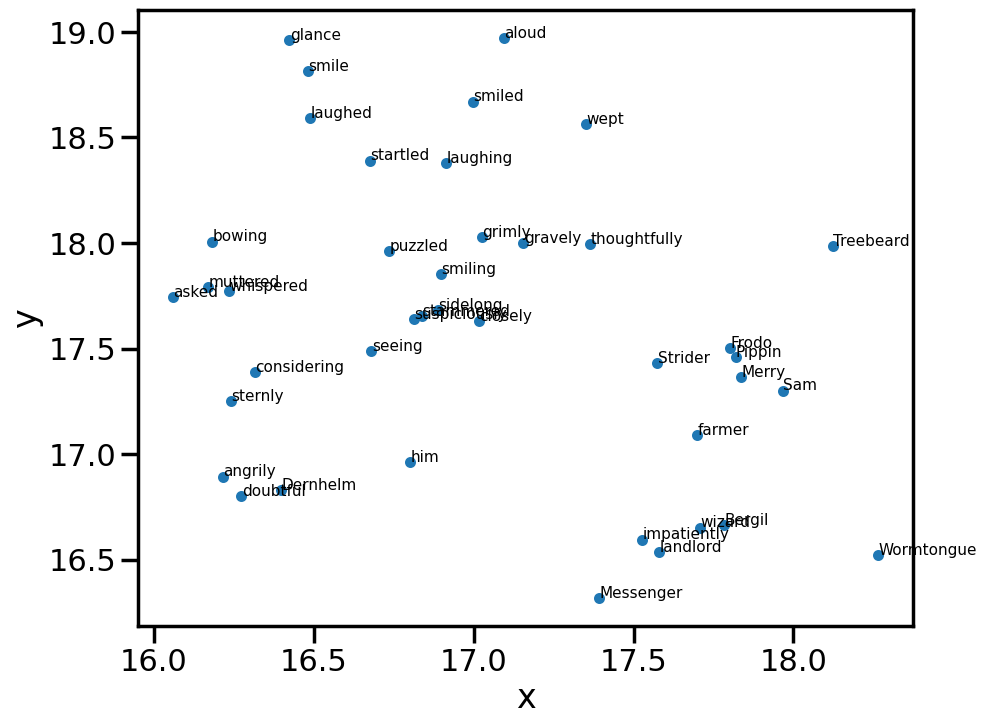

In [ ]:
plot_region(x_bounds=(16, 19), y_bounds=(16, 19))